# Compare classical score performance accross key parameters

In [1]:
import os
import sys
import gensim
import numpy as np

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA\\matchms\\data\\'
sys.path.insert(0, ROOT)

In [3]:
from custom_functions.plotting_functions import plot_precentile

### Load reference scores

In [2]:
filename = os.path.join(path_data,'similarities_daylight2048_jaccard.npy')
matrix_similarities_fingerprint_daylight = np.load(filename)

In [4]:
matrix_similarities_fingerprint_daylight.shape

(12797, 12797)

### Load pre-derived similarity scores: cosine score

In [5]:
filename = os.path.join(path_data,'similarities_cosine_tol0005.npy')
matrix_similarities_cosine = np.load(filename)

filename = os.path.join(path_data,'similarities_cosine_tol0005_matches.npy')
matrix_matches_cosine = np.load(filename)

print("Matrix dimension", matrix_matches_cosine.shape)

Matrix dimension (12797, 12797)


### Compare performance accross min_match parameter

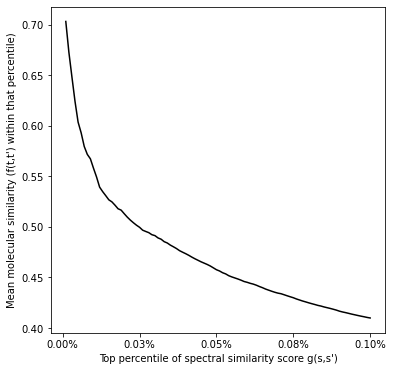

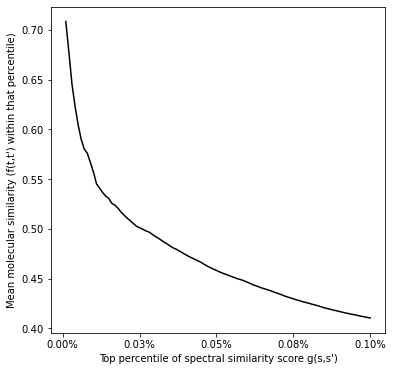

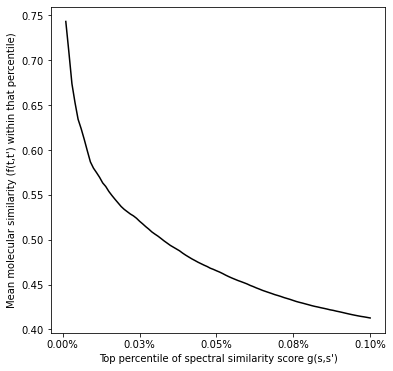

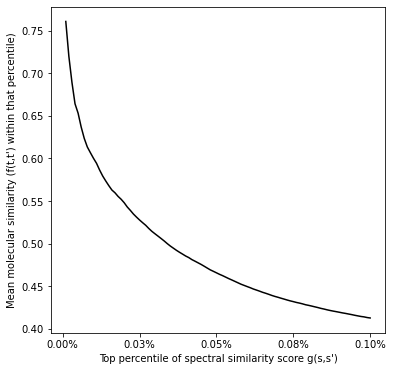

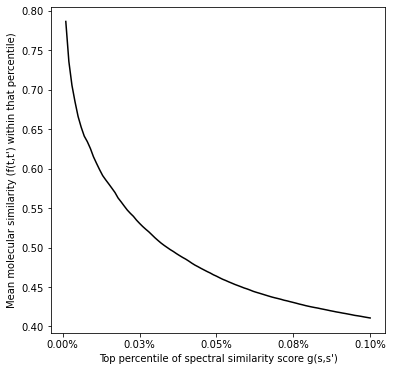

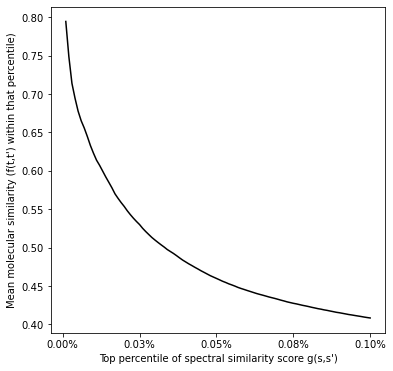

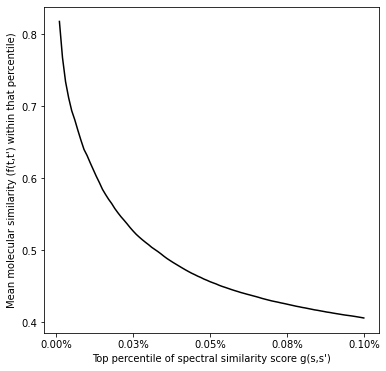

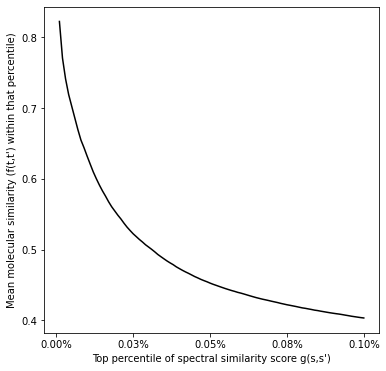

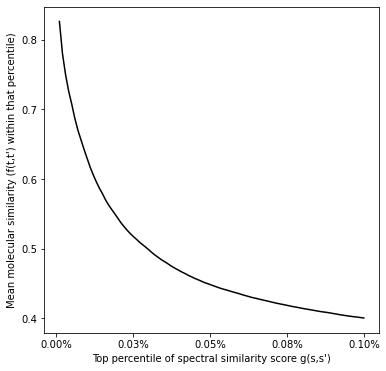

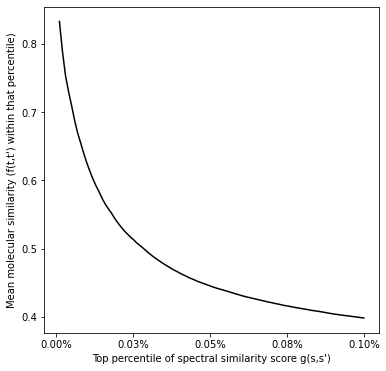

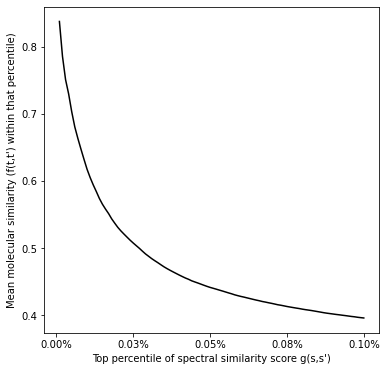

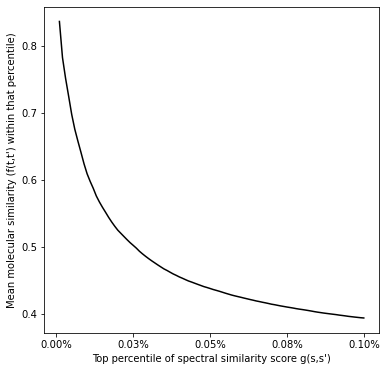

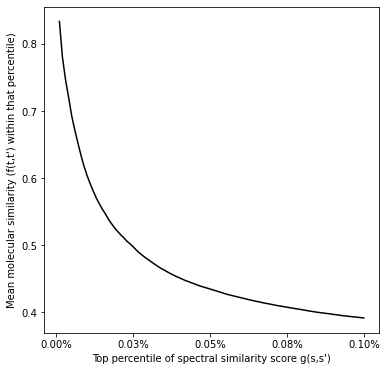

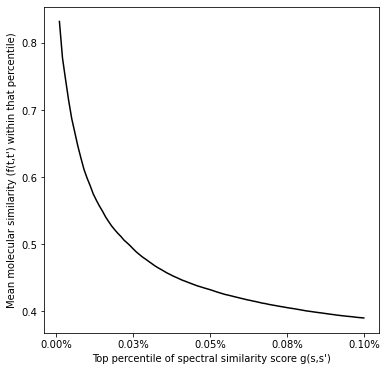

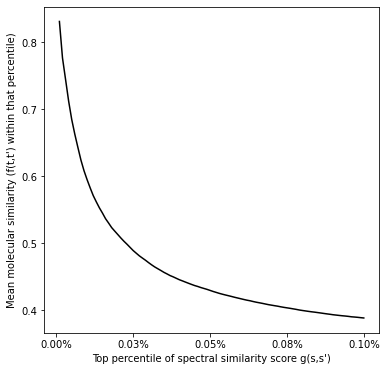

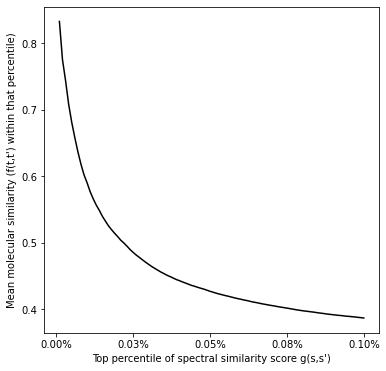

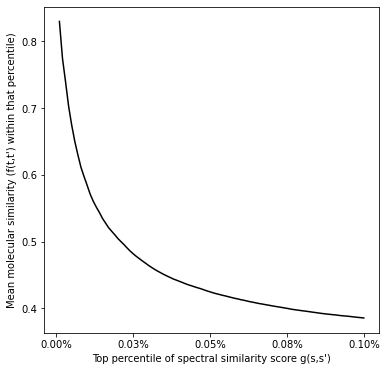

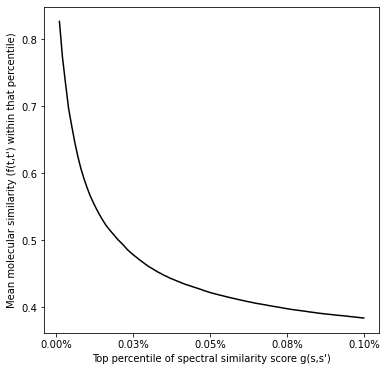

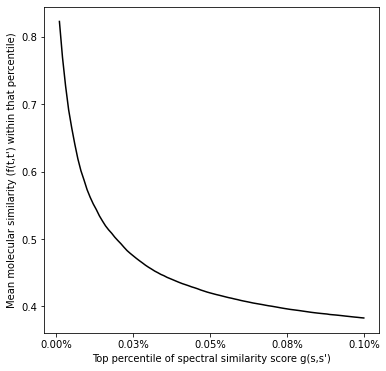

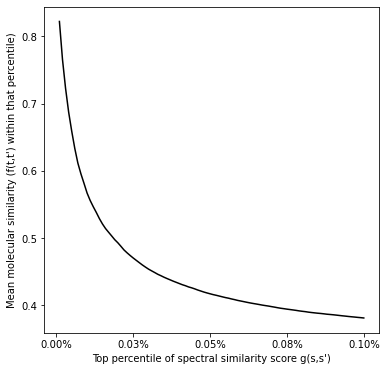

In [6]:
min_matches = np.arange(1,21)

percentiles_cosine = []
for min_match in min_matches:
    # Only consider values for mininum min_match matching peaks
    matrix_similarities_cosine_minmatch = matrix_similarities_cosine.copy()
    matrix_similarities_cosine_minmatch[matrix_matches_cosine < min_match] = 0

    percentile = plot_precentile(matrix_similarities_fingerprint_daylight,
                                 matrix_similarities_cosine_minmatch,
                                 num_bins=100, show_top_percentile=0.1,
                                 ignore_diagonal=True)
    
    percentiles_cosine.append(percentile)

In [7]:
filename = os.path.join(path_data, 'percentiles_cosine_tol0005_min_matches.npy')
np.save(filename, percentiles_cosine)

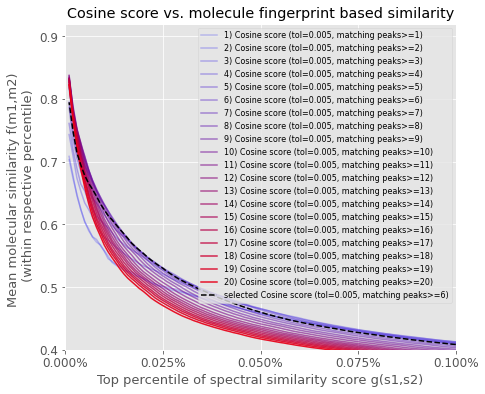

In [16]:
from matplotlib import pyplot as plt

#Compare all:
num_bins = 100
show_top_percentile = 0.1

tol = 0.005

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,6))

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]
min_matches = np.arange(1,21)
min_matches_plot = min_matches

color_count = 0
color_max = len(min_matches_plot) + 1
for i, percentile in enumerate(percentiles_cosine):
    if min_matches[i] in min_matches_plot:
        plt.plot(x_percentiles, percentile, 
                 color=(color_count/color_max, 0, 1-color_count/color_max, 0.2+0.8*color_count/color_max),
                 label='{}) Cosine score (tol={}, matching peaks>={})'.format((color_count+1), tol, min_matches[i]))
        color_count += 1

i = 5    
plt.plot(x_percentiles, percentiles_cosine[i], 
         "--", color="black",
         label='selected Cosine score (tol={}, matching peaks>={})'.format(tol, min_matches[i]))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xticks(np.linspace(0, show_top_percentile, 5),
           ["{:.3f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend(fontsize=8)
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.title("Cosine score vs. molecule fingerprint based similarity")
plt.xlim(0, 0.1)
plt.ylim(0.4, 0.92)
plt.savefig(os.path.join(path_data, 'Benchmarking_Cosine_tol0005_min_matches.pdf'))

### Load pre-derived similarity scores: modified cosine score

In [17]:
filename = os.path.join(path_data,'similarities_mod_cosine_tol0005.npy')
matrix_similarities_mod_cosine = np.load(filename)

filename = os.path.join(path_data,'similarities_mod_cosine_tol0005_matches.npy')
matrix_matches_mod_cosine = np.load(filename)

print("Matrix dimension", matrix_matches_mod_cosine.shape)

Matrix dimension (12797, 12797)


### Compare performance accross min_match parameter

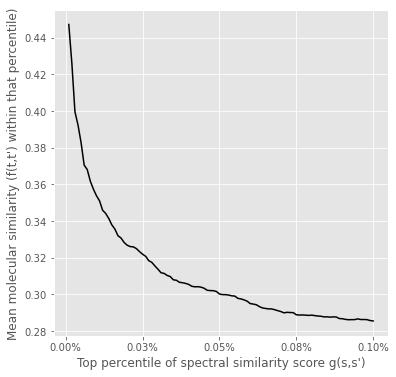

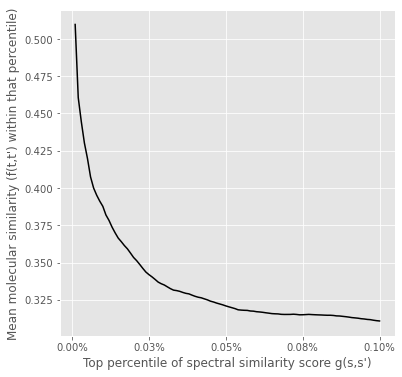

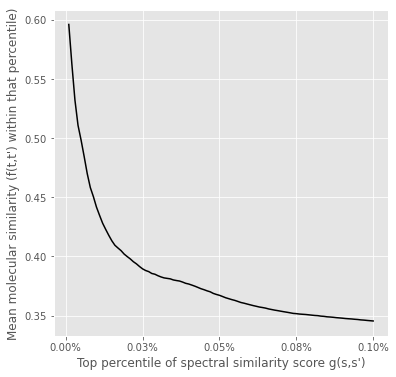

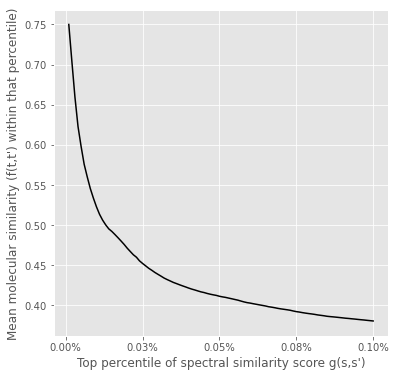

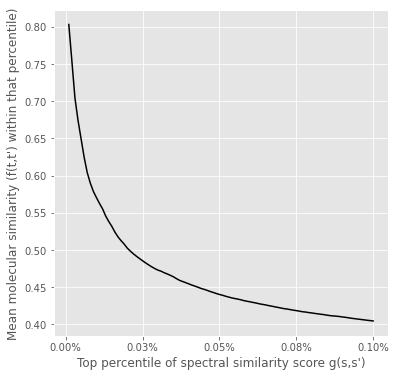

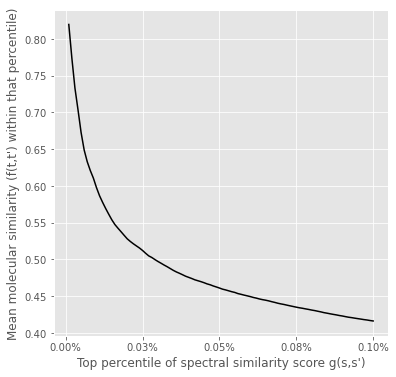

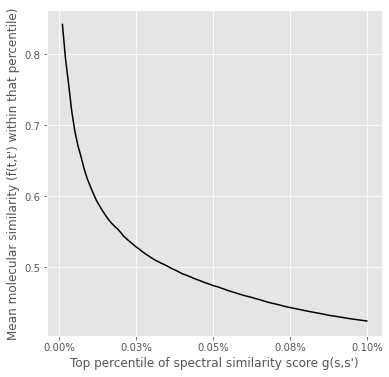

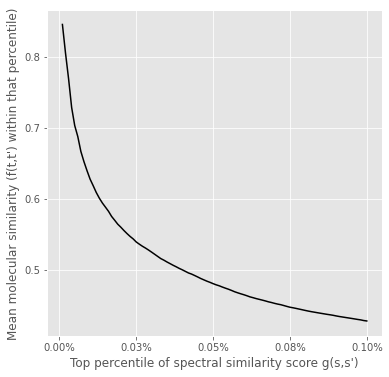

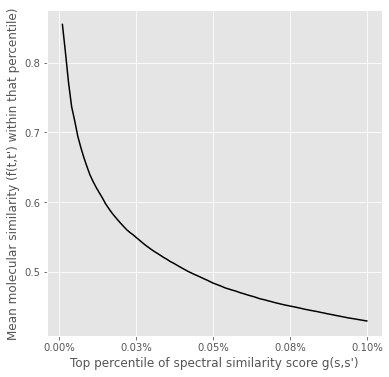

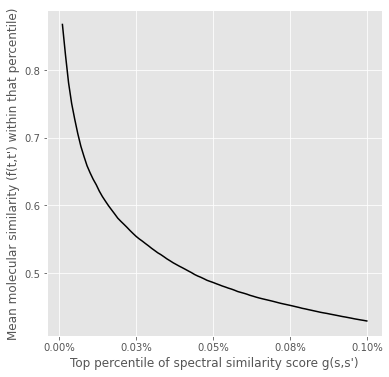

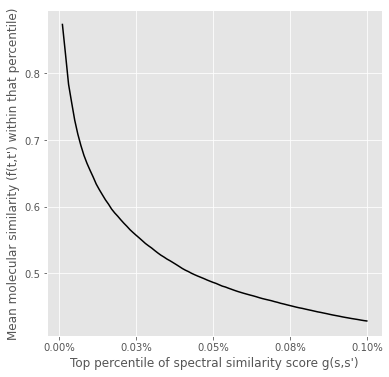

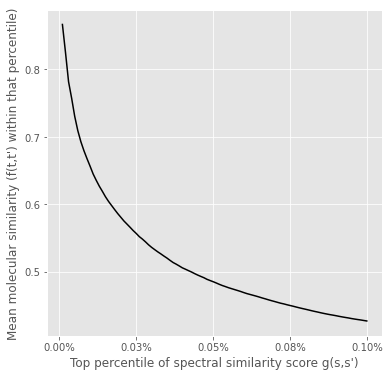

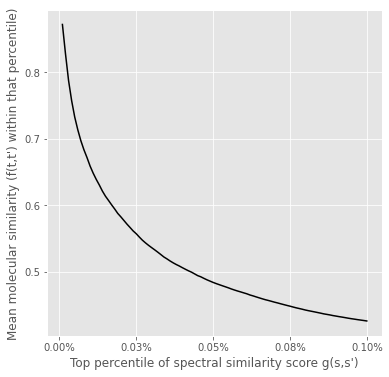

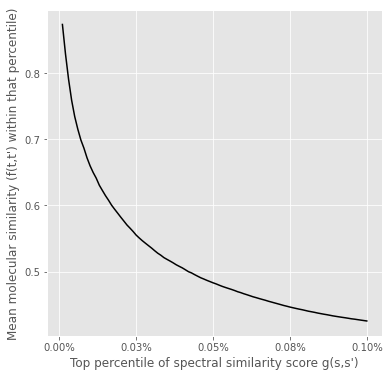

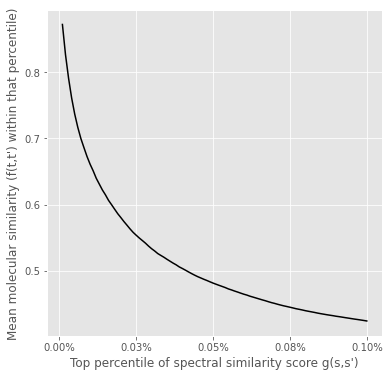

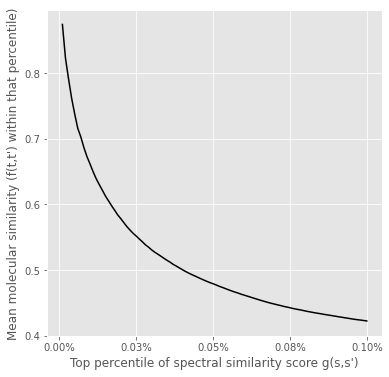

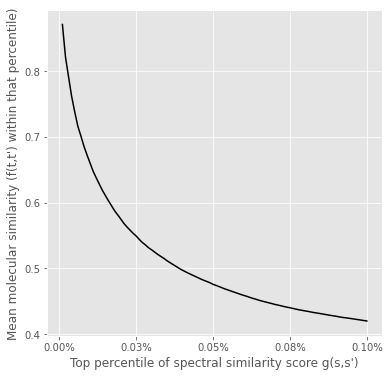

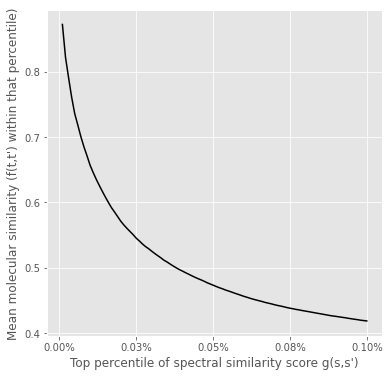

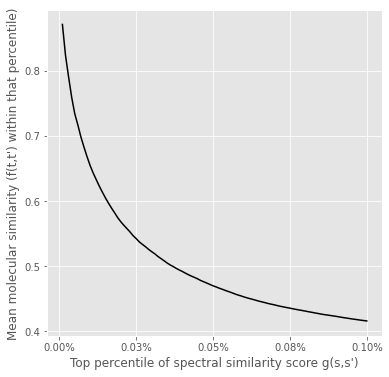

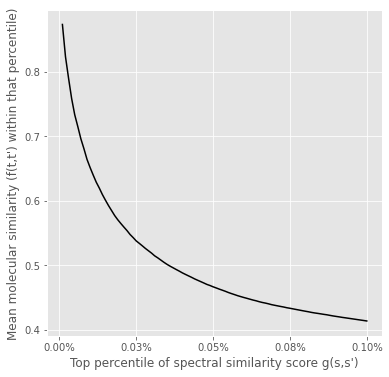

In [18]:
min_matches = np.arange(1,21)

percentiles_mod_cosine = []
for min_match in min_matches:
    # Only consider values for mininum min_match matching peaks
    matrix_similarities_mod_cosine_minmatch = matrix_similarities_mod_cosine.copy()
    matrix_similarities_mod_cosine_minmatch[matrix_matches_mod_cosine < min_match] = 0

    percentile = plot_precentile(matrix_similarities_fingerprint_daylight,
                                 matrix_similarities_mod_cosine_minmatch,
                                 num_bins=100, show_top_percentile=0.1,
                                 ignore_diagonal=True)
    
    percentiles_mod_cosine.append(percentile)

In [19]:
filename = os.path.join(path_data, 'percentiles_mod_cosine_tol0005_min_matches.npy')
np.save(filename, percentiles_mod_cosine)

In [20]:
filename = os.path.join(path_data, 'percentiles_mod_cosine_tol0005_min_matches.npy')
np.save(filename, percentiles_mod_cosine)

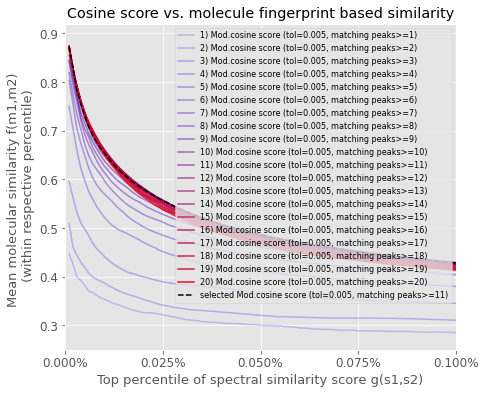

In [24]:
from matplotlib import pyplot as plt

#Compare all:
num_bins = 100
show_top_percentile = 0.1

tol = 0.005

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,6))

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]
min_matches = np.arange(1,21)
min_matches_plot = min_matches

color_count = 0
color_max = len(min_matches_plot) + 1
for i, percentile in enumerate(percentiles_mod_cosine):
    if min_matches[i] in min_matches_plot:
        plt.plot(x_percentiles, percentile, 
                 color=(color_count/color_max, 0, 1-color_count/color_max, 0.2+0.8*color_count/color_max),
                 label='{}) Mod.cosine score (tol={}, matching peaks>={})'.format((color_count+1), tol, min_matches[i]))
        color_count += 1

i = 10    
plt.plot(x_percentiles, percentiles_mod_cosine[i], 
         "--", color="black",
         label='selected Mod.cosine score (tol={}, matching peaks>={})'.format(tol, min_matches[i]))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xticks(np.linspace(0, show_top_percentile, 5),
           ["{:.3f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend(fontsize=8)
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.title("Cosine score vs. molecule fingerprint based similarity")
plt.xlim(0, 0.1)
plt.ylim(0.25, 0.92)
plt.savefig(os.path.join(path_data, 'Benchmarking_mod_cosine_tol0005_min_matches.pdf'))

---